In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Conv2D, MaxPooling2D,
    Flatten, Dense, Dropout
)
from tensorflow.keras.optimizers import Adam

from sklearn.metrics import confusion_matrix

/opt/miniconda3/lib/python3.13/site-packages/keras/src/export/tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


In [3]:
DATA_DIR = "/Users/julie/Desktop/CareerFoundry/3.1./Data/Weather Images"

In [4]:
IMG_SIZE = (128, 128)
BATCH_SIZE = 32

In [5]:
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

In [6]:
train_data = datagen.flow_from_directory(
    DATA_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    subset="training",
    shuffle=True
)

Found 901 images belonging to 4 classes.


In [7]:
val_data = datagen.flow_from_directory(
    DATA_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    subset="validation",
    shuffle=False
)

Found 224 images belonging to 4 classes.


In [8]:
print(train_data.class_indices)


{'Cloudy': 0, 'Rain': 1, 'Shine': 2, 'Sunrise': 3}


In [9]:
#build CNN model
model = Sequential([
    Conv2D(32, (3,3), activation="relu", input_shape=(128,128,3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation="relu"),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation="relu"),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation="relu"),
    Dropout(0.5),
    Dense(4, activation="softmax")
])


/opt/miniconda3/lib/python3.13/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
# compile model
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,305,156 (12.61 MB)

 Trainable params: 3,305,156 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
# train model
history = model.fit(
    train_data,
    epochs=15,
    validation_data=val_data,
    verbose=1
)


Epoch 1/15
29/29 ━━━━━━━━━━━━━━━━━━━━ 7s 190ms/step - accuracy: 0.6204 - loss: 0.8331 - val_accuracy: 0.8125 - val_loss: 0.5482
Epoch 2/15
29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 153ms/step - accuracy: 0.7714 - loss: 0.6199 - val_accuracy: 0.8036 - val_loss: 0.6552
Epoch 3/15
29/29 ━━━━━━━━━━━━━━━━━━━━ 5s 154ms/step - accuracy: 0.8169 - loss: 0.5297 - val_accuracy: 0.8036 - val_loss: 0.5184
Epoch 4/15
29/29 ━━━━━━━━━━━━━━━━━━━━ 5s 182ms/step - accuracy: 0.8746 - loss: 0.3316 - val_accuracy: 0.8348 - val_loss: 0.3920
Epoch 5/15
29/29 ━━━━━━━━━━━━━━━━━━━━ 5s 179ms/step - accuracy: 0.8879 - loss: 0.3130 - val_accuracy: 0.8527 - val_loss: 0.3975
Epoch 6/15
29/29 ━━━━━━━━━━━━━━━━━━━━ 5s 183ms/step - accuracy: 0.9057 - loss: 0.2697 - val_accuracy: 0.8125 - val_loss: 0.5094
Epoch 7/15
29/29 ━━━━━━━━━━━━━━━━━━━━ 5s 162ms/step - accuracy: 0.9101 - loss: 0.2751 - val_accuracy: 0.8661 - val_loss: 0.3338
Epoch 8/15
29/29 ━━━━━━━━━━━━━━━━━━━━ 5s 156ms/step - accuracy: 0.9267 - loss: 0.2220 - val_accuracy: 0.

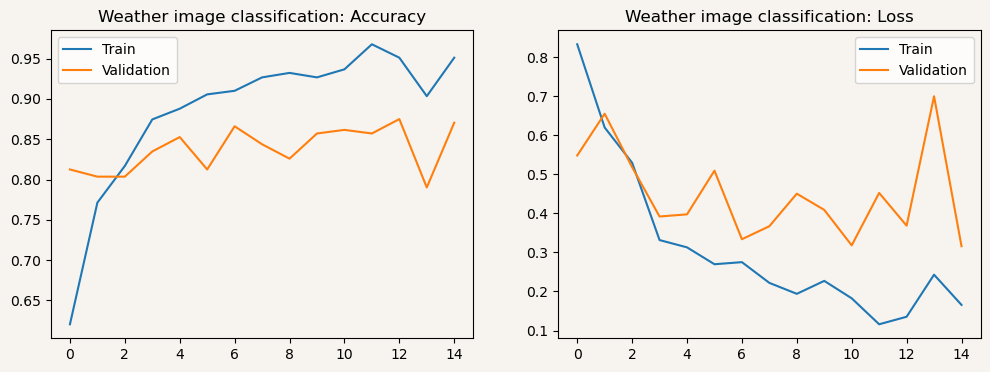

In [16]:
# accuracy loss plot
plt.figure(figsize=(12,4),  facecolor="#F7F3EE")


plt.subplot(1,2,1)
plt.plot(history.history["accuracy"], label="Train")
plt.plot(history.history["val_accuracy"], label="Validation")
plt.title("Weather image classification: Accuracy")
plt.gca().set_facecolor("#F7F3EE") 
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history["loss"], label="Train")
plt.plot(history.history["val_loss"], label="Validation")
plt.title("Weather image classification: Loss")
plt.gca().set_facecolor("#F7F3EE")
plt.legend()

plt.show()


In [13]:
val_loss, val_acc = model.evaluate(val_data, verbose=0)
print(f"Validation accuracy: {val_acc*100:.1f}%")
print(f"Validation loss: {val_loss:.3f}")


Validation accuracy: 87.1%
Validation loss: 0.316


### Confussion Matrix

In [14]:
# Get true labels
y_true = val_data.classes

# Predict class probabilities
y_pred_probs = model.predict(val_data)

# Convert probabilities to class indices
y_pred = np.argmax(y_pred_probs, axis=1)

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 149ms/step


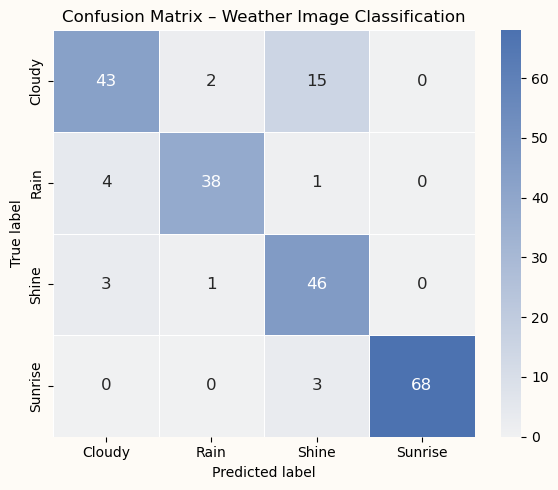

In [15]:
# Build confusion matrix
cm = confusion_matrix(y_true, y_pred)
class_names = list(val_data.class_indices.keys())

plt.figure(figsize=(6, 5))

sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap=sns.light_palette("#4C72B0", as_cmap=True),
    cbar=True,
    linewidths=0.5,
    linecolor="white",
    xticklabels=class_names,
    yticklabels=class_names,
    annot_kws={"size": 12}
)

# Background colors
plt.gca().set_facecolor("#FEFBF6")
plt.gcf().patch.set_facecolor("#FEFBF6")

# Labels and title
plt.title("Confusion Matrix – Weather Image Classification")
plt.xlabel("Predicted label")
plt.ylabel("True label")

plt.tight_layout()
plt.show()